In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.metrics import classification_report

# ELM Theory

$X_{(N, n)} -Z-> H_{(n, p)} -w_{(p, 1)}-> y_{(N, 1)}$

In [33]:
samples = 30
features = 5
neurons = 10
output = 3

In [34]:
input_x = np.random.uniform(size=(samples, features))
input_x = np.hstack([np.ones(shape=(samples, 1)), input_x])
input_x.shape

(30, 6)

In [35]:
input_weights = np.random.uniform(size=(features + 1, neurons))
input_weights.shape

(6, 10)

In [36]:
hidden_out = np.tanh(np.matmul(input_x, input_weights))
hidden_out = np.hstack([np.ones(shape=(samples, 1)), hidden_out])
hidden_out.shape


(30, 11)

In [37]:
hidden_weights = np.random.uniform(size=(neurons + 1, output))
hidden_weights.shape

(11, 3)

# Test ELM Methodology

In [38]:
std_dev = 1.2
neurons_hidden = 10
neurons_output = 1
n_samples = 50

In [39]:
class_0 = np.vstack([
    np.random.normal(size=(n_samples, 2), scale=std_dev) + np.tile([2, 2], n_samples).reshape(-1, 2),
    np.random.normal(size=(n_samples, 2), scale=std_dev) - np.tile([2, 2], n_samples).reshape(-1, 2)
])
class_1 = np.vstack([
    np.random.normal(size=(n_samples, 2), scale=std_dev) + np.tile([2, -2], n_samples).reshape(-1, 2),
    np.random.normal(size=(n_samples, 2), scale=std_dev) + np.tile([-2, 2], n_samples).reshape(-1, 2)
])

In [40]:
data = np.vstack([class_0, class_1])
target = np.repeat([-1, 1], repeats=n_samples * 2).reshape(-1, 1)
data.shape, target.shape

((200, 2), (200, 1))

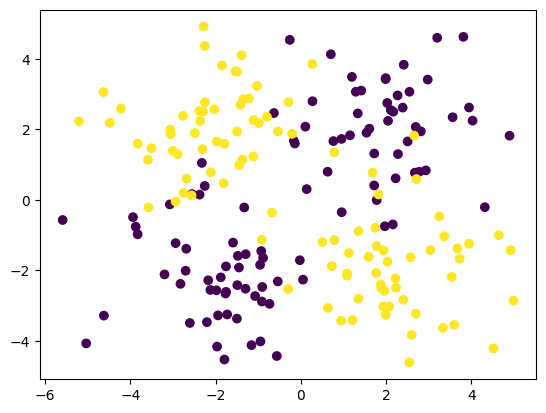

In [41]:
plt.scatter(data[:, 0], data[:, 1], c=target)

### Generate random weights for input data

In [42]:
input_weights = np.random.uniform(size=(data.shape[1] + 1, neurons_hidden))
input_weights.shape

(3, 10)

### Transform data with non-linear functions

In [43]:
hidden_input = np.dot(
    np.hstack([np.ones(shape=(data.shape[0], 1)), data]),
    input_weights
)
hidden_input.shape

(200, 10)

In [44]:
hidden_output = np.tanh(hidden_input)
hidden_output = np.hstack([np.ones(shape=(data.shape[0], 1)), hidden_output])
hidden_output.shape

(200, 11)

### Find output weights

In [45]:
output_weights = np.dot(
    np.linalg.pinv(hidden_output),
    target
)
output_weights.shape

(11, 1)

### Calculate network output

In [46]:
output_input = np.dot(
    hidden_output,
    output_weights
)
output_input.shape

(200, 1)

In [47]:
output_output = output_input * 1

In [55]:
print(classification_report(output_output > 0, target > 0))

              precision    recall  f1-score   support

       False       0.86      0.87      0.86        99
        True       0.87      0.86      0.87       101

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



---

# ELM Model

In [50]:
class ELMClassifier:
    def __init__(self, neurons: int, seed: int = 0):
        self.neurons = neurons
        self.seed = seed

    def fit(self, X, y):
        # GENERATE RANDOM HIDDEN LAYER WEIGHTS
        self.input_weights_ = np.random.uniform(size=(X.shape[1] + 1, self.neurons))

        return self

    def predict(self, X):
        # CALCULATE HIDDEN LAYER INPUT
        hidden_input = np.dot(
            np.hstack([np.ones(shape=(data.shape[0], 1)), data]),
            self.input_weights_
        )

        # CALCULATE HIDDEN LAYER OUTPUT
        hidden_output = np.tanh(hidden_input)
        hidden_output = np.hstack([np.ones(shape=(X.shape[0], 1)), hidden_output])
        
        # CALCULATE OUTPUT LAYER WEIGHTS
        output_weights = np.dot(
            np.linalg.pinv(hidden_output),
            target
        )

        output_input = np.dot(
            hidden_output,
            output_weights
        )

        return output_input.reshape(-1, 1)

In [51]:
model = ELMClassifier(neurons=10)
model.fit(data, target);

In [52]:
preds = model.predict(data)

In [53]:
print(classification_report(y_pred=preds > 0, y_true=target > 0))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87       100
        True       0.90      0.81      0.85       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



---